# hypercat
## Hypercube of CLUMPY AGN Tori###

### Imports, setup

In [1]:
import hypercat.hypercat as hc
import hypercat.plotting as hp
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
#cube = hc.ModelCube(hdffile='/data2/robert/hypercat/hypercat_20170109.hdf5',hypercube='imgdata',subcube_selection='examples/democube.json')

### Load a small sub-hypercube into RAM

In [2]:
cube = hc.ModelCube(hdffile='/home/robert/flexo/data/hypercat/hypercat_20170109.hdf5',hypercube='imgdata',subcube_selection='examples/democube.json')
#cube = hc.ModelCube(hdffile='/media/robert/ntoshiba3tb/work_takewithme/hypercat/hypercat_20170109.hdf5',hypercube='imgdata',subcube_selection='examples/subcube_interferometry.json')
#cube = hc.ModelCube(hdffile='/media/robert/ntoshiba3tb/work_takewithme/hypercat/hypercat_20170109.hdf5',hypercube='imgdata',subcube_selection='examples/democube.json')

Opening HDF5 file: /home/robert/flexo/data/hypercat/hypercat_20170109.hdf5 
Loading sampling parameters.
Closing HDF5 file.
Loading objects from file examples/democube.json.
Loading hyperslab [shape: (1,11,1,3,2,1,7,221,441)] from hypercube 'imgdata' [shape: (5,11,4,12,5,7,19,221,441)] to RAM (171.76 MB required) ...
Done.
Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.
Inspect loaded hypercube with .print_sampling()

Parameter  Range                Nvalues  Sampled values
-------------------------------------------------------
  sig      [ 45.000 -  45.000]  (  1)    45.000
    i *    [  0.000 -  90.000]  ( 11)     0.000, 25.842, 36.870, 45.573, 53.130, 60.000, 66.422, 72.542, 78.463, 84.261, 90.000
    Y      [ 20.000 -  20.000]  (  1)    20.000
    N *    [  5.000 -   7.000]  (  3)     5.000,  6.000,  7.000
    q *    [  0.000 -   0.500]  (  2)     0.000,  0.500
   tv      [ 40.000 -  40.000]  (  1)    40.000
 wave *    [  2.200 -  18.500]  (  7)     2

### Make a source

In [3]:
#ngc1068 = hc.Source(cube,luminosity='2e45 erg/s',distance='14.4 Mpc',name='ngc1068',pa='42 deg')  # assuming Tsub=1500K, this sets pixelscale
ngc1068 = hc.Source(cube,luminosity='2e45 erg/s',distance='7.4 Mpc',name='ngc1068',pa='42 deg')  # assuming Tsub=1500K, this sets pixelscale

### Source with parameters and wavelength makes a sky

In [4]:
sky = ngc1068((88,5,0,4.5),total_flux_density='2500 mJy')  # 'perfect' image of the sky
#sky = ngc1068((20,88,10,1.5,40,12),total_flux_density='2500 mJy')  # 'perfect' image of the sky

Rotated image (see self.data) by 42.0 deg in direction 'NE'.


### We need an instrument to look at the source

In [5]:
tmt = hc.Telescope(psfdict={'psf':'model','diameter':30.,'strehl':0.8},name='TMT',pixelscale_detector='4 mas')  # name and pixelscale_detector are optional; '4 mas' is for MICHI instrument

### Observe the sky with the instrument

In [6]:
obs, psf = tmt.observe(sky)  # observed image of sky, and PSF image

### Plot the perfect sky image, the sky observed with telesecope, and the PSF

Plotting panel (0,0)
Plotting panel (0,1)
Plotting panel (0,2)


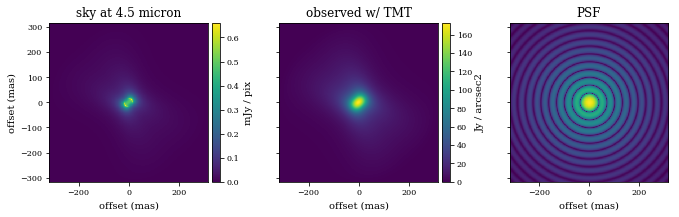

In [7]:
fig, axes = hp.multiplot([sky,obs,psf],geometry=(1,3),titles=['sky at %s'%sky.wave,'observed w/ %s'%tmt.name,'PSF'],colorbars=[True,True,False],units=[None,'Jy/arcsec^2',''])  # None means 'native' units, i.e. whatever is attached to the image data
#fig, axes = hp.multiplot??


In [19]:
fig, axes = hp.multiplot

TypeError: 'function' object is not iterable

In [ ]:
fig, axes = hp.multiplot

### Let's observe the source at several wavelengths

In [8]:
#waves = [2.2,4.47,8.99,12,18] # micron
#fluxdensities = [0.098,2.5,17.8,10.2,19.95] # photometric data points (in Jy) from NED and Asmus+2013
#skies = [ngc1068((88,5,0,wave),total_flux_density=str(Fnu)+'Jy') for wave,Fnu in zip(waves,fluxdensities)]
#images, psfs = zip(*[tmt(sky) for sky in skies])

waves = [2.2,12,18] # micron
fluxdensities = [0.098,10.2,19.95] # photometric data points (in Jy) from NED and Asmus+2013
skies = [ngc1068((88,5,0,wave),total_flux_density=str(Fnu)+'Jy') for wave,Fnu in zip(waves,fluxdensities)]
images, psfs = zip(*[tmt(sky) for sky in skies])

Rotated image (see self.data) by 42.0 deg in direction 'NE'.
Rotated image (see self.data) by 42.0 deg in direction 'NE'.
Rotated image (see self.data) by 42.0 deg in direction 'NE'.


Plotting panel (0,0)
Plotting panel (0,1)
Plotting panel (0,2)


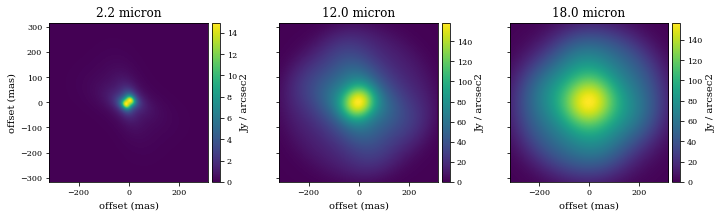

In [9]:
# plot
n = len(waves)
#fig, axes = hp.multiplot(images+psfs,geometry=(2,3),panelsize=3.5,\
#                         colorbars=[True]*n,units=['Jy/arcsec^2']*n,\
#                         titles=[img.wave for img in images]+['PSF']*n,\
#                         hspace=-0.4)

fig, axes = hp.multiplot(images,geometry=(1,3),\
                         colorbars=[True]*n,units=['Jy/arcsec^2']*n,\
                         titles=[img.wave for img in images])


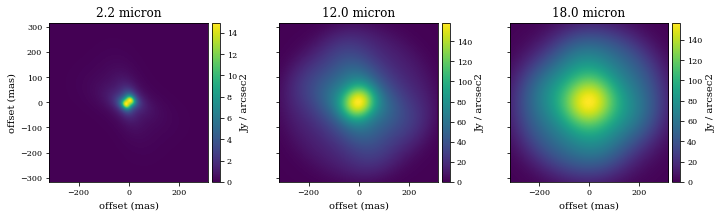

In [21]:
fig

### Make a new source (such source doesn't exist, unfortunately)

In [10]:
myagn = hc.Source(cube,luminosity='1e45 erg/s',distance='2 Mpc',name='myAGN',pa='120 deg')
sky = myagn((60,5,0.5,2.2),total_flux_density='10 Jy')

Rotated image (see self.data) by 120.0 deg in direction 'NE'.


### Observe it with several instruments

In [11]:
vlt = hc.Telescope(psfdict={'psf':'model','diameter':8,'strehl':0.1},name='VLT')
tmt = hc.Telescope(psfdict={'psf':'model','diameter':30.,'strehl':0.8},name='TMT')
jwst = hc.Telescope(psfdict={'psf':'examples/PSF_MIRI_F1000W.fits','hdukw':1,'pixelscalekw':'pixelscl'},name='JWST')
instruments = (vlt,tmt,jwst)
images, psfs = zip(*[instrument.observe(sky) for instrument in instruments])

Rotated image (see self.data) by 120.0 deg in direction 'NE'.


[u'VLT@2.2 micron', 'PSF', u'TMT@2.2 micron', 'PSF', u'JWST@2.2 micron', 'PSF']
Plotting panel (0,0)
Plotting panel (0,1)
Plotting panel (0,2)
Plotting panel (0,3)
Plotting panel (0,4)
Plotting panel (0,5)


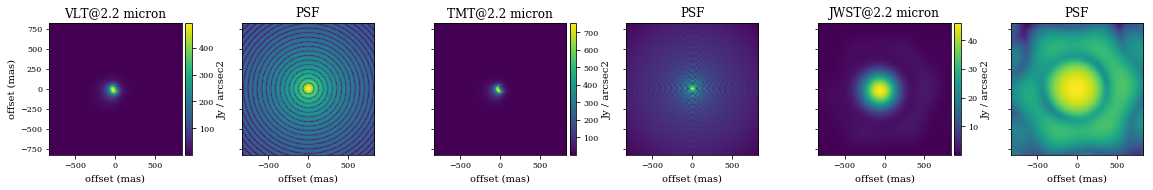

In [12]:
# plot
n = len(images)
imgs = []
titles = []
for j in range(n):
    imgs.append(images[j])
    titles.append('%s@%s' % (instruments[j].name,images[j].wave))
    imgs.append(psfs[j])
    titles.append('PSF')
    
print titles
    

un = 'Jy/arcsec^2'

#titles = ['%s@%s' % (instruments[j].name,images[j].wave) for j in xrange(n)] + ['PSF']*n
fig, axes = hp.multiplot(imgs,geometry=(1,6),panelsize=3.5,\
                         colorbars=[True,False,True,False,True,False],units=[un,None,un,None,un,None],\
                         titles=titles,\
                         hspace=-0.4)

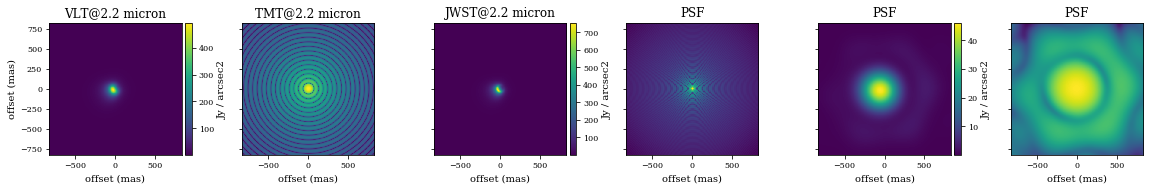

In [30]:
fig

### Total flux density mostly preserved, except losses due to smearing outside FOV by big PSF

In [13]:
for i,im in enumerate(images):
    print "%5s  %s" % (instruments[i].name, im.F)

  VLT  9.99249564937 Jy
  TMT  9.98502128089 Jy
 JWST  9.13177247644 Jy


# Interferometry

In [14]:
cube = hc.ModelCube(hdffile='/home/robert/flexo/data/hypercat/hypercat_20170109.hdf5',hypercube='imgdata',subcube_selection='examples/subcube_interferometry.json')

Opening HDF5 file: /home/robert/flexo/data/hypercat/hypercat_20170109.hdf5 
Loading sampling parameters.
Closing HDF5 file.
Loading objects from file examples/subcube_interferometry.json.
Loading hyperslab [shape: (3,2,2,1,2,2,10,221,441)] from hypercube 'imgdata' [shape: (5,11,4,12,5,7,19,221,441)] to RAM (178.46 MB required) ...
Done.
Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.
Inspect loaded hypercube with .print_sampling()

Parameter  Range                Nvalues  Sampled values
-------------------------------------------------------
  sig *    [ 15.000 -  45.000]  (  3)    15.000, 30.000, 45.000
    i *    [ 84.261 -  90.000]  (  2)    84.261, 90.000
    Y *    [  5.000 -  10.000]  (  2)     5.000, 10.000
    N      [  5.000 -   5.000]  (  1)     5.000
    q *    [  1.500 -   2.000]  (  2)     1.500,  2.000
   tv *    [ 40.000 -  60.000]  (  2)    40.000, 60.000
 wave *    [  4.800 -  12.000]  ( 10)     4.800,  8.700,  9.300,  9.800, 10.000, 10.3

Rotated image (see self.data) by 42.0 deg in direction 'NE'.
Rotated image (see self.data) by 42.0 deg in direction 'NE'.
Rotated image (see self.data) by 42.0 deg in direction 'NE'.
Rotated image (see self.data) by 42.0 deg in direction 'NE'.
Rotated image (see self.data) by 42.0 deg in direction 'NE'.
Plotting panel (0,0)
Plotting panel (0,1)
Plotting panel (0,2)
Plotting panel (0,3)
Plotting panel (0,4)
Plotting panel (1,0)
Plotting panel (1,1)
Plotting panel (1,2)
Plotting panel (1,3)
Plotting panel (1,4)


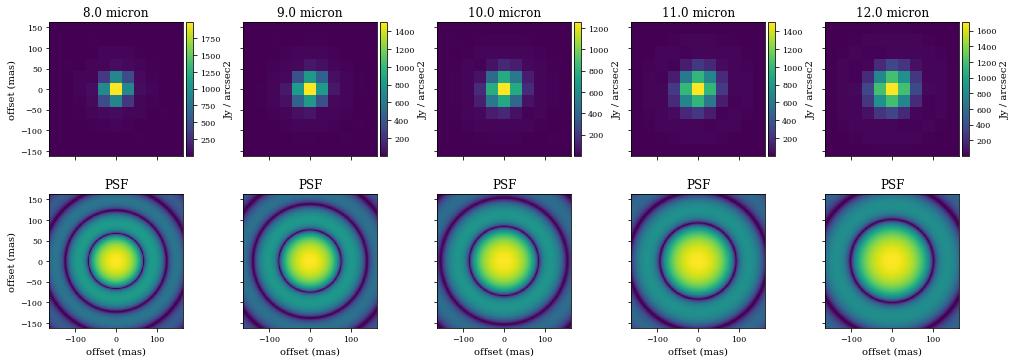

In [15]:
ngc1068 = hc.Source(cube,luminosity='2e45 erg/s',distance='14.4 Mpc',name='ngc1068',pa='42 deg')

sig = 25
i   = 88.0
Y   = 6
q   = 2.0
tv  = 49.0

waves = [8.0,9.0,10.0,11.0,12.0]         # micron
fluxdensities = [7.5,7.0,7.2,10.0,13.0]  # photometric data points in Jy  from  AH+11
skies = [ngc1068((sig,i,Y,q,tv,wave),total_flux_density=str(Fnu)+'Jy') for wave,Fnu in zip(waves,fluxdensities)]
tmt = hc.Telescope(psfdict={'psf':'model','diameter':30.,'strehl':0.8},name='TMT',pixelscale_detector='27.5 mas')
images, psfs = zip(*[tmt(sky) for sky in skies])

# plot
n = len(waves)
fig, axes = hp.multiplot(images+psfs,geometry=(2,len(waves)),panelsize=3.5,\
                         colorbars=[True]*n,units=['Jy/arcsec^2']*n,\
                         titles=[img.wave for img in images]+['PSF']*n,\
                         hspace=-0.4)

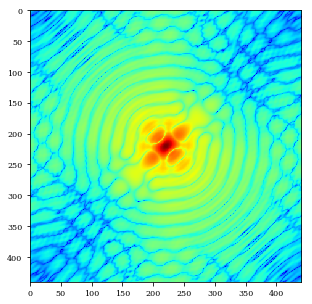

In [16]:
import numpy as np
import pylab as plt

#Pick one model, for example NGC 1068 at 8.0 um
ori = skies[0].data

#Interferometry
ori_fft = np.fft.fftshift(np.fft.fft2(ori))

fft_img=np.abs(ori_fft)
fft_phases= np.fft.fftshift(np.angle(ori_fft,deg=True))

#Image of NGC 1068 at 8.0 in the FFT space
fig = plt.figure(figsize=(5,5))
plt.imshow(np.log10(fft_img),cmap=matplotlib.cm.jet)

#plt.contourf(np.log10(fft_img),31,aspect=1.)

In [17]:
### Estimate the convertion from sky space to FFT space.

gridsize = ori.shape[0]

#NGC1068
pxscale_mod = 0.000654641214133*1000 ## in mas

fft_freq=np.fft.fftfreq(gridsize,pxscale_mod)

lam = 8.0*1E-6                       ## in um
roll=np.floor(gridsize/2).astype("int")
vis_norm=fft_img[0,0]
vis=np.roll(fft_img,roll,0)/vis_norm
freq=np.roll(fft_freq,roll,0)
##
## pxscale -> fftscale
fftscale=np.diff(freq)[0]           ## cycles / mas per pixel in FFT image
mas2rad=np.deg2rad(1./3600000.)     ## mas per rad
fftscale = fftscale/mas2rad * lam   ## meters baseline per px in FFT image at a given wavelength

print "Pixel scale in FFT image is: ", fftscale, " m (Baseline) per pixel"

Pixel scale in FFT image is:  5.71574950051  m (Baseline) per pixel


The target name: Circinus
Data contains 51 wavelength data points.
The instrument is MIDI/PRISM
The station number: 9
wavelength coverage is  8.0  um-- 13.0 um.
Max. visibility amplitude at 8um is:  0.909326100349
Max. visibility amplitude at 13um is:  0.899873971939
The data contains 152 visibility points.
Here it shows that PA vs. visibility amplitude. It reproduces the feature well of Fig. 6 in Tristram+14.


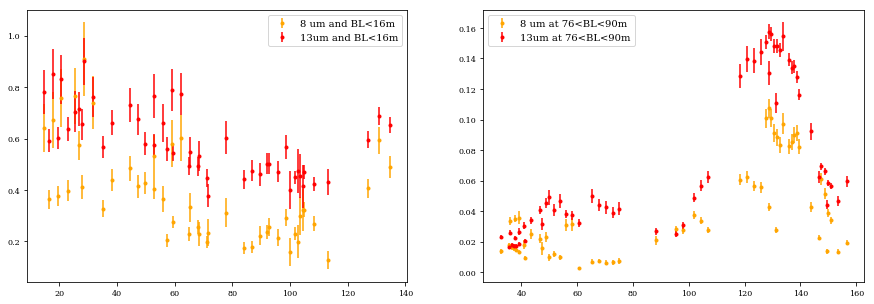

In [20]:
import pandas as pd
import astropy.io.fits as fits

hdulist = fits.open('Circinus_clean.oifits')
array=hdulist['OI_ARRAY'].data
target=hdulist['OI_TARGET'].data
wave=hdulist['OI_WAVELENGTH'].data
vis=hdulist['OI_VIS'].data

image_data= fits.getdata('Circinus_clean.oifits', ext=0)

#wavelength table
wave_um=wave['EFF_WAVE']*1e6

print "The target name:", hdulist[2].data['TARGET'][0]
print "Data contains", len(wave_um), "wavelength data points."
print "The instrument is", hdulist[3].header['INSNAME']
print "The station number:", len(hdulist[1].data['STA_INDEX'])
print "wavelength coverage is ", np.min(wave_um), " um--", np.max(wave_um), "um."

#np.shape(vv[:,0])




####hdulist[4] or hdulist['OI_VIS'] contains visibility information.

#visibility amplitude
vv=vis['VISAMP']
#averaged visibility amplitude
vv_err=vis['VISAMPERR']

#giving the typical wavelength
ww=wave['EFF_WAVE']

#Let's do with 8um
##Picking up the central wavelength
lam=8.0e-6
##wavelength range
dlam=0.5e-6
#Picking up the wavelength range of lam-dlam<lambda<lam+dlam
ix=(ww>lam-dlam)&(ww<lam+dlam)

##Then, finally obtaining the wavelength averaged visibility (axis=1 is the key! 
#If you do it by axis=0, this will give us the averaged visibility during the observation at each wavelength)
vv_ave_8um=np.average(vv[:,ix], axis=1)
##averaging the noise, too: you should give the sqrt of the number of the sample
vv_err_8um=np.median(vv_err[:,ix], axis=1)/np.sqrt(np.sum(ix))

print "Max. visibility amplitude at 8um is: ", np.max(vv_ave_8um)

#Let's do with 13um
lam=13.0e-6
dlam=0.5e-6
ix=(ww>lam-dlam)&(ww<lam+dlam)
vv_ave_13um=np.average(vv[:,ix], axis=1)
vv_err_13um=np.median(vv_err[:,ix], axis=1)/np.sqrt(np.sum(ix))


print "Max. visibility amplitude at 13um is: ", np.max(vv_ave_13um)

vv_ave=np.average(vv[:,:], axis=1)

vv_err=vis['VISAMPERR']

#def modelvis(u,v,vis,fftscale,roll):
## round to nearest pixel position in image
#u=-u
#x=np.round(u/fftscale).astype("int")
#y=roll+np.round(v/fftscale).astype("int")
#if u<0:
#    x=-x
#    y=-y
#
#return(vis[y,x]) ## Python arrays are y,x not x,y...

#visibility
vis_u=vis['UCOORD']
vis_v=vis['VCOORD']
#visibility located at center-symmetric points
vis_u_rev=-vis['UCOORD']
vis_v_rev=-vis['VCOORD']

#combine the data set of visibility coordinates

bl=np.sqrt(vis_u**2+vis_v**2)
pa=np.rad2deg(np.arctan(vis_u/vis_v))

#making df of bl, pa
df_vis_u=pd.DataFrame(vis_u, columns=['vis_u'])
df_vis_v=pd.DataFrame(vis_v, columns=['vis_v'])
df_vis_u_rev=pd.DataFrame(vis_u_rev, columns=['vis_u'])
df_vis_v_rev=pd.DataFrame(vis_v_rev, columns=['vis_v'])

#combine the data
##coordinates of (U, V)
df_vis_u_new=pd.concat([df_vis_u, df_vis_u_rev])
df_vis_v_new=pd.concat([df_vis_v, df_vis_v_rev])
df_vis=pd.concat([df_vis_u, df_vis_v], axis=1)

#making df of each param
df_vv_ave_8um=pd.DataFrame(vv_ave_8um, columns=['vis_8um'])
df_vv_err_8um=pd.DataFrame(vv_err_8um, columns=['vis_8um_err'])
df_vv_ave_13um=pd.DataFrame(vv_ave_13um, columns=['vis_13um'])
df_vv_err_13um=pd.DataFrame(vv_err_13um, columns=['vis_13um_err'])
df_bl=pd.DataFrame(bl, columns=['bl'])
df_pa=pd.DataFrame(pa, columns=['PA'])
df_pa['PA']=df_pa['PA'].where(df_pa['PA']>0, 180+df_pa['PA'])
df_comb=pd.concat([df_bl, df_pa, df_vv_ave_8um, df_vv_err_8um, df_vv_ave_13um, df_vv_err_13um], axis=1)

df_vis.loc[:, 'visamp_8um']=df_vv_ave_8um

#Number of visibility
print "The data contains", len(vv), "visibility points."




############################PA vs. VISIBILITY AMPLITUDE###############

print "Here it shows that PA vs. visibility amplitude. It reproduces the feature well of Fig. 6 in Tristram+14."

fig, axes = plt.subplots(1,2, figsize=(15,5))

plot_range=df_comb['bl']<16.0

axes[0].errorbar(df_comb[plot_range]['PA'], df_comb[plot_range]['vis_8um'],\
                  yerr=df_comb[plot_range]['vis_8um_err'].values, fmt='.', 
                  color='orange', label='8 um and BL<16m')
axes[0].errorbar(df_comb[plot_range]['PA'], df_comb[plot_range]['vis_13um'],\
                   yerr=df_comb[plot_range]['vis_13um_err'].values, fmt='.', color='red', label='13um and BL<16m')
axes[0].legend()

#axes[2,0].scatter()
plot_range= (df_comb['bl']>76.0) & (df_comb['bl']<90.0)

axes[1].errorbar(df_comb[plot_range]['PA'], df_comb[plot_range]['vis_8um'],\
                  yerr=df_comb[plot_range]['vis_8um_err'].values, fmt='.', 
                  color='orange', label='8 um at 76<BL<90m')
axes[1].errorbar(df_comb[plot_range]['PA'], df_comb[plot_range]['vis_13um'],\
                   yerr=df_comb[plot_range]['vis_13um_err'].values, fmt='.', color='red', label='13um at 76<BL<90m')
axes[1].legend()

5.71574950051
(441, 441) 220 77
(32.591306802045906, 156.55513376586208, 0.0027518496848642827, 0.11742242634296417) (32.591306802045906, 156.55513376586208) (0.0027518496848642827, 0.11742242634296417)


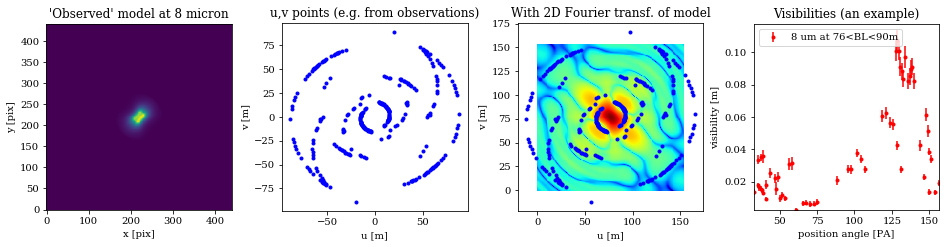

In [181]:
from scipy import ndimage

#import matplotlib
fontsize = 10
plt.rcParams['font.size'] = fontsize
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize

#Load uv plane at this time we only have the Circinus uv plane, I use this one as an example
from astropy.io import fits
hdulist = fits.open('/home/robert/science/data/circinus/Circinus_Tristram+2014.oifits') # Circinus_clean.oifits
vis=hdulist['OI_VIS'].data

#visibility amplitude
vv=vis['VISAMP']
#averaged visibility amplitude
vv_err=vis['VISAMPERR']

#visibility
vis_u=vis['UCOORD']
vis_v=vis['VCOORD']
#visibility located at center-symmetric points
vis_u_rev=-vis['UCOORD']
vis_v_rev=-vis['VCOORD']

#combine the data set of visibility coordinates
bl=np.sqrt(vis_u**2+vis_v**2)
pa=np.rad2deg(np.arctan(vis_u/vis_v))


u = np.concatenate([vis_u_rev,vis_u])
v = np.concatenate([vis_v_rev,vis_v])

#fig1, axes = plt.subplots(1,3,figsize=(15,5)) #,dpi=200)
fig = plt.figure(figsize=(16,4)) #,dpi=200)

ax1 = fig.add_subplot(141)
ax1.imshow(ori,origin='lower')
#axes[0].set_xlabel('u [m]')
#axes[0].set_ylabel('v [m]')
ax1.set_title("'Observed' model at 8 micron")
ax1.set_xlabel('x [pix]')
ax1.set_ylabel('y [pix]')

ax2 = fig.add_subplot(142,aspect='equal')
ax2.plot(u,v,'o',ms=3,color='b')
#axes[2].imshow(imuv) #u,v,'o')
ax2.set_xlabel('u [m]')
ax2.set_ylabel('v [m]')
ax2.set_title('u,v points (e.g. from observations)')
#ax3.set_xlim(-90,90)
#ax3.set_ylim(-90,90)
#fig.tight_layout()

ax3 = fig.add_subplot(143)
fimg = np.log10(fft_img)
print fftscale
#fimgr = ndimage.zoom(fimg,fftscale)
npix = fimg.shape[0]
cdx = npix/2
idx  = int(npix/fftscale) #/2
print fimg.shape, cdx, idx
fimgz = fimg[cdx-idx:cdx+idx,cdx-idx:cdx+idx]


# u,v to meters
u_px = u/fftscale
v_px = v/fftscale

#fimgr, dummya, dummyb = hc.resampleImage(fimg,fftscale)
#fimgr.shape
#print fimgr
ax3.imshow(fimgz,origin='lower',cmap=matplotlib.cm.jet)
newcdx = fimgz.shape[0]/2
#ax3.plot(u/fftscale+newcdx,v/fftscale+newcdx,'o')
ax3.plot(u+newcdx,v+newcdx,'o',ms=3,color='b')
#ax3.plot(u+fft_img.shape[0]/2,v+fft_img.shape[1]/2,'o',ms=1)
#axes[0].set_xlabel('u [m]')
#axes[0].set_ylabel('v [m]')
ax3.set_title("With 2D Fourier transf. of model")
ax3.set_xlabel('u [m]')
ax3.set_ylabel('v [m]')



plot_range= (df_comb['bl']>76.0) & (df_comb['bl']<90.0)
x, y = df_comb[plot_range]['PA'], df_comb[plot_range]['vis_8um']

ax4 = fig.add_subplot(144) #,aspect='equal') #(x.max()-x.min())/float(y.max()-y.min()))
#ax4.errorbar(df_comb[plot_range]['PA'], df_comb[plot_range]['vis_8um'],\
im = ax4.errorbar(x,y,\
                  yerr=df_comb[plot_range]['vis_8um_err'].values, fmt='.', 
                  color='r', label='8 um at 76<BL<90m')
#ax4.errorbar(df_comb[plot_range]['PA'], df_comb[plot_range]['vis_13um'],\
#                   yerr=df_comb[plot_range]['vis_13um_err'].values, fmt='.', color='red', label='13um at 76<BL<90m')
ax4.legend(loc='upper left')

#xdelta, ydelta = 3., 0.05
extent = (x.min(),x.max(),y.min(),y.max()+0.01)
ax4.set_xlim(extent[:2])
ax4.set_ylim(extent[2:])
print extent, extent[:2], extent[2:]
ax4.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2])))
ax4.set_title("Visibilities (an example)")
ax4.set_xlabel('position angle [PA]')
ax4.set_ylabel('visibility [m]')


#fig.tight_layout()
fig.subplots_adjust(wspace=0.27)

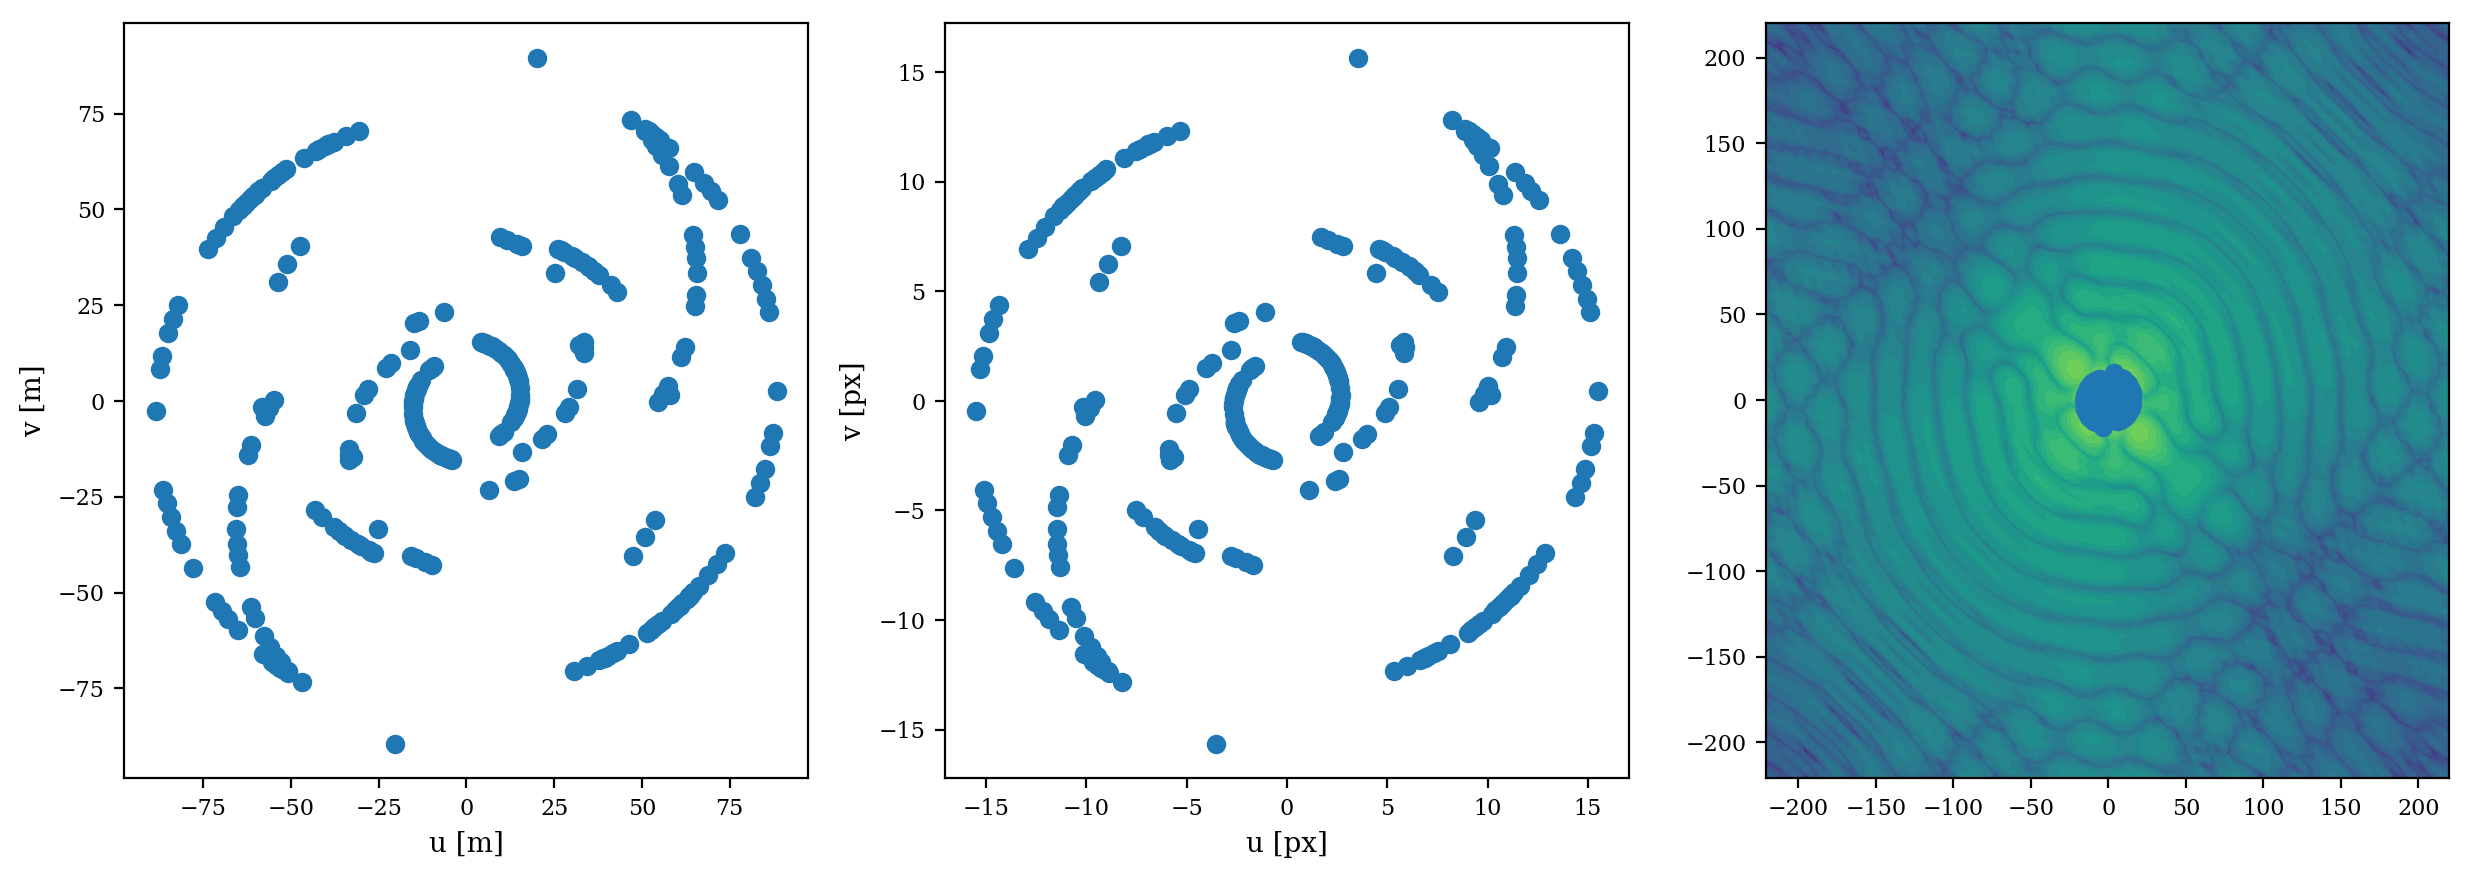

In [49]:
### uv plane from m to px given the above estimated pixel scale per meter

u_px = u/fftscale
v_px = v/fftscale

fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5),dpi=200)

ax1.plot(u,v,'o')
ax1.set_xlabel('u [m]')
ax1.set_ylabel('v [m]')

ax2.plot(u_px,v_px,'o')
ax2.set_xlabel('u [px]')
ax2.set_ylabel('v [px]')

ori_fft = np.fft.fftshift(np.fft.fft2(ori))
fft_phases= np.fft.fftshift(np.angle(ori_fft,deg=False))

fft_img=np.abs(ori_fft)

x = np.linspace(-fft_img.shape[0]/2,fft_img.shape[0]/2,fft_img.shape[0])

ax3.contourf(x,x,np.log10(fft_img),31)
ax3.plot(u_px,v_px,'o')

(200, 240)

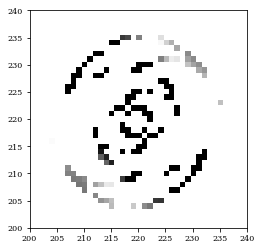

In [50]:
#Visibility map
a = np.zeros([ori.shape[0],ori.shape[1]])

for ii in range(len(u)):
    vv = u_px[ii] + a.shape[0]/2
    uu = v_px[ii] + a.shape[0]/2
    a[vv,uu] = 1.  
    
plt.imshow(a*fft_img,interpolation='Nearest',origin='lower',cmap='gray_r',vmin=0,vmax=0.5)
plt.ylim([200,240])
plt.xlim([200,240])    

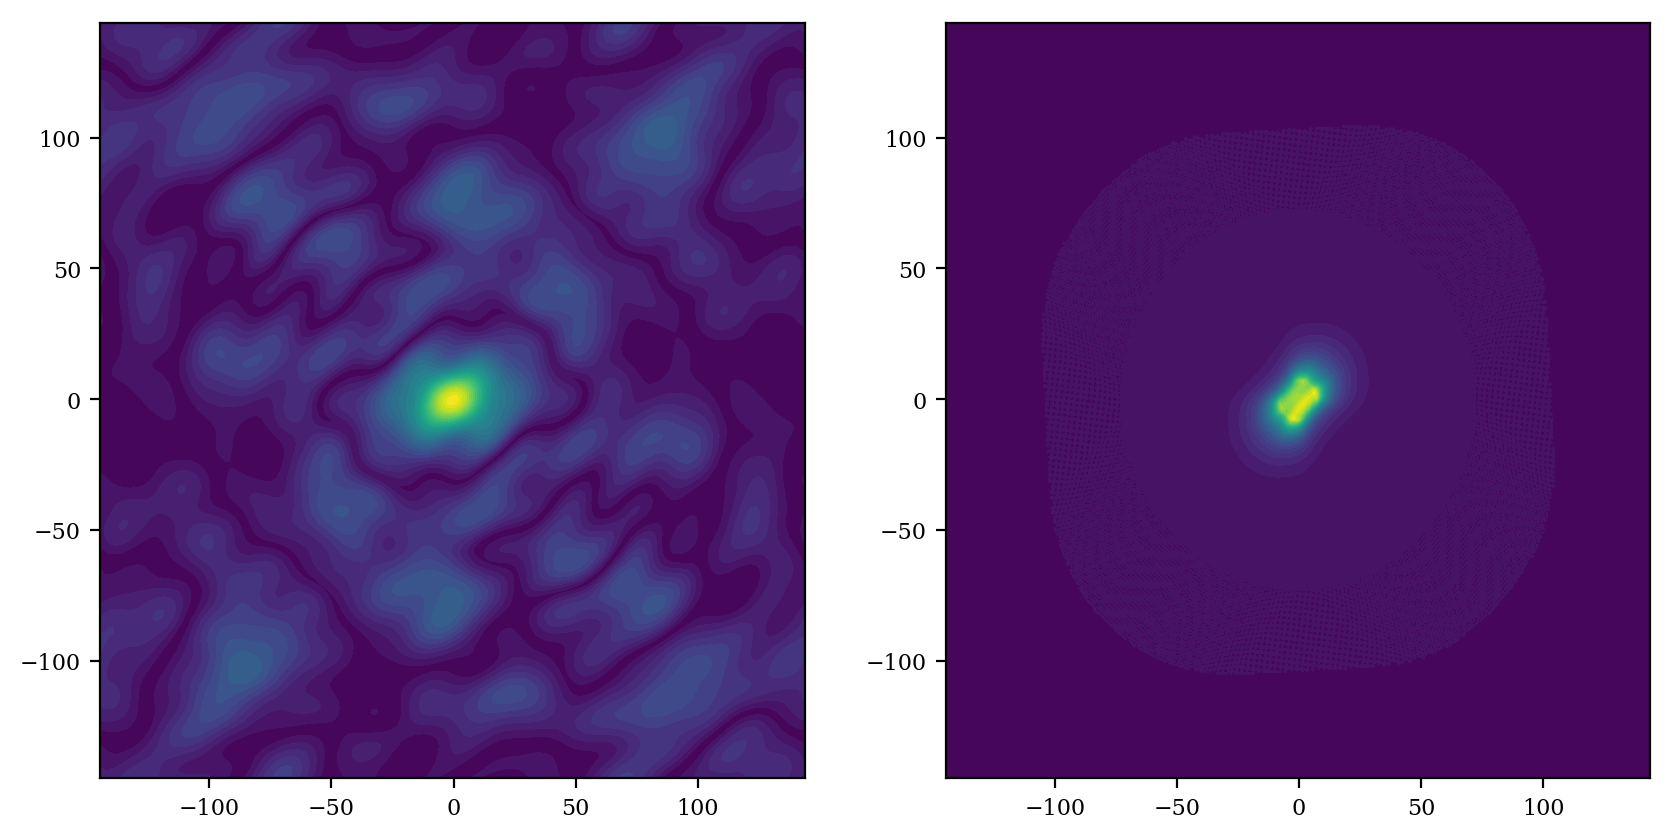

In [51]:
### Just in case we want to come back to the sky space, then we will FFT the visibility map.
exp_fft = np.fft.fftshift(np.fft.ifft2(a*fft_img))


fft_exp=np.abs(exp_fft)

x = np.linspace(-fft_img.shape[0]/2,fft_img.shape[0]/2,fft_img.shape[0])*pxscale_mod

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5),dpi=200)
ax1.contourf(x,x,fft_exp,31)

ax2.contourf(x,x,ori,31)


### uuumm there is a 90deg offset that I'm not sure where it comes from :-s

In [1]:
from hypercat.morphology import *

In [35]:
img = obs.data
npix = obs.data.shape[0]
print npix

159


In [43]:
scales = N.arange(1,151,1)
print scales

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]


In [44]:
wmaxes = [signal.convolve2d(img,get_wavelet(npix,a_)/a_,mode='same').max()/a_ for a_ in scales]

In [45]:
print wmaxes

[0.2102145292181464, 4.2897773567070843, 7.3491921454236033, 7.4951183979448173, 8.4717290781804948, 9.4519168171188728, 9.8777118645678907, 10.156298263377659, 10.302257626160563, 10.188011028042556, 10.017400420907718, 9.6474480546872545, 9.3678371399063494, 9.0314854672297447, 8.627590613469728, 8.2305359274551986, 7.8203152401160514, 7.4485896970007053, 7.0773007282410161, 6.7190129172763822, 6.3734996191885189, 6.053331648070218, 5.7398704300779597, 5.4433277892326908, 5.1694477604142035, 4.9125334184116536, 4.6711354848242923, 4.4404211372649822, 4.2234421053425208, 4.0231409537393192, 3.8338478595707022, 3.6577745871626681, 3.49084362845556, 3.334288157396406, 3.1881503917602916, 3.0490442697149884, 2.9193764906985495, 2.7966538295471368, 2.6817687412740856, 2.5726922810046839, 2.4692435542599793, 2.3721272661118826, 2.2799189784462, 2.1928502439101747, 2.1100683426373172, 2.0314682275244351, 1.9570179975193414, 1.8862541931445447, 1.8192238232865863, 1.7554575703821786, 1.69504

In [80]:
wmaxes = N.array(wmaxes)

632.14150623 mas
(-316.0707531149673, 316.0707531149673, -316.0707531149673, 316.0707531149673)
35.7815946923


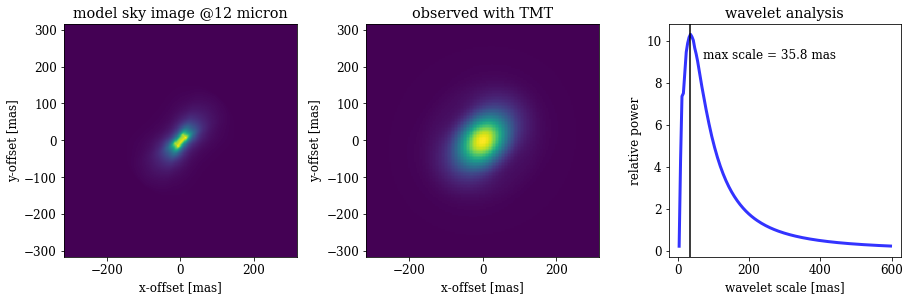

In [153]:
import pylab as plt
fontsize = 12
plt.rcParams['font.size'] = fontsize
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize

fig, axes = plt.subplots(1,3,figsize=(15,5))
plt.setp(axes.flat, aspect=1.0) # adjustable='box-forced'

print obs.FOV
delta = obs.FOV.value/2.
extent = (-delta,delta,-delta,delta)
print extent
axes[0].imshow(sky.data,origin='lower',extent=extent,interpolation='none')
axes[0].set_xlabel('x-offset [mas]')
axes[0].set_ylabel('y-offset [mas]')
axes[0].set_title('model sky image @12 micron')


axes[1].imshow(img,origin='lower',extent=extent,interpolation='none')
axes[1].set_xlabel('x-offset [mas]')
axes[1].set_ylabel('y-offset [mas]')
axes[1].set_title('observed with TMT')

axes[2].plot(scales*obs.pixelscale.value,wmaxes,ls='-',color='b',label='foo',lw=3,alpha=0.8)
maxscale = scales[wmaxes.argmax()]*obs.pixelscale.value
print maxscale
axes[2].axvline(maxscale,color='k')
axes[2].set_xlabel('wavelet scale [mas]')
axes[2].set_ylabel('relative power')
axes[2].text(0.15,0.85,'max scale = %.1f mas' % maxscale,transform=axes[2].transAxes)
axes[2].set_title('wavelet analysis')
extent = (0.1*obs.pixelscale.value,150*obs.pixelscale.value,wmaxes.min(),wmaxes.max())
#axes[2].set_xlim(extent[:2])
#axes[2].set_ylim(extent[2:])
#axes[2].set_xscale('log')
axes[2].set_aspect(14.8*obs.pixelscale.value)
#axes[2].set_aspect(N.diff(extent[2:])/N.diff(extent[:2]))

fig.subplots_adjust(wspace=0.3)

#colors, linestyles, names = ('y','k','b'), ('-','--','-'), ('G1','G2','G3=G1+G2')
#for j,name in enumerate(names):
#    ax.plot(scales,wmaxes[names[j]],ls=linestyles[j],color=colors[j],label=name,lw=3,alpha=0.8)
#p.legend(loc='upper right',frameon=0)
#ax.set_xlabel('wavelet scale (pixel)')
#ax.set_ylabel('power')
#ax.axvline(10,color='k')

In [143]:
print scales

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]


In [65]:
obs.FOV/float(npix)

<Quantity 3.9757327435844947 mas>

In [66]:
obs.pixelscale

<Quantity 3.9757327435844942 mas>